## Model: k-Nearest Neighbors
### features: Pokémon base stat + typing, based off first turn of battle
#### base stats normalized and typing one-hot encoded

### Load CSV file
#### Import necessary libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load in data file

In [13]:
training02_data = pd.read_csv("../data/trainingdata02_stats_type.csv")

# print column names
#for col in training02_data.columns:
    #print(col)

training02_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100024 entries, 0 to 100023
Columns: 174 entries, battle_id to p2b_Water
dtypes: float64(1), int64(112), object(61)
memory usage: 132.8+ MB


In [14]:
training02_data = pd.read_csv("../data/trainingdata02_stats_type.csv")
training02_data.iloc[:,4::]

,weather,field,condition,p1_side,p1a_form,p1a_hp,p1a_ability,p1a_item,p1a_move,p1a_status,...,p2b_Ghost,p2b_Grass,p2b_Ground,p2b_Ice,p2b_Normal,p2b_Poison,p2b_Psychic,p2b_Rock,p2b_Steel,p2b_Water
0,NaN,Psychic Terrain:5,NaN,NaN,Smeargle,100,unknown,unknown,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Psychic Terrain:4,Trick Room:4,NaN,Smeargle,1,Moody,NaN,Follow Me:19,NaN,...,0,0,0,0,0,0,0,0,0,0
2,SunnyDay:5,Psychic Terrain:3,Trick Room:3,NaN,Torkoal,100,Drought,unknown,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,SunnyDay:4,Psychic Terrain:2,Trick Room:2,NaN,Torkoal,100,Drought,unknown,Eruption:4,NaN,...,0,0,0,0,0,0,0,0,0,0
4,SunnyDay:3,Psychic Terrain:1,Trick Room:1,NaN,Torkoal,55,Drought,unknown,Eruption:3,NaN,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100019,NaN,Psychic Terrain:3,NaN,NaN,Flutter Mane,100,unknown,unknown,"Taunt:19,Moonblast:14",NaN,...,0,0,1,0,1,0,0,0,0,0
100020,NaN,Psychic Terrain:2,NaN,NaN,Flutter Mane,100,unknown,unknown,"Taunt:18,Moonblast:14",NaN,...,0,0,1,0,1,0,0,0,0,0
100021,SunnyDay:5,NaN,NaN,NaN,Groudon,100,unknown,unknown,NaN,NaN,...,0,0,0,0,1,0,1,0,0,0
100022,SunnyDay:4,NaN,NaN,NaN,Groudon,14,unknown,Leftovers,Precipice Blades:9,NaN,...,0,0,0,0,1,0,1,0,0,0


In [15]:
# drop battles that end in a tie

training02_data = training02_data.drop(training02_data[training02_data['win'] == 0].index)
training02_data = training02_data[training02_data['total_turn'] >= 5]

training02_data

,battle_id,turn,total_turn,rank,weather,field,condition,p1_side,p1a_form,p1a_hp,...,p2b_Ghost,p2b_Grass,p2b_Ground,p2b_Ice,p2b_Normal,p2b_Poison,p2b_Psychic,p2b_Rock,p2b_Steel,p2b_Water
0,2099996083,0,5,1643.5,NaN,Psychic Terrain:5,NaN,NaN,Smeargle,100,...,0,0,0,0,0,0,0,0,0,0
1,2099996083,1,5,1643.5,NaN,Psychic Terrain:4,Trick Room:4,NaN,Smeargle,1,...,0,0,0,0,0,0,0,0,0,0
2,2099996083,2,5,1643.5,SunnyDay:5,Psychic Terrain:3,Trick Room:3,NaN,Torkoal,100,...,0,0,0,0,0,0,0,0,0,0
3,2099996083,3,5,1643.5,SunnyDay:4,Psychic Terrain:2,Trick Room:2,NaN,Torkoal,100,...,0,0,0,0,0,0,0,0,0,0
4,2099996083,4,5,1643.5,SunnyDay:3,Psychic Terrain:1,Trick Room:1,NaN,Torkoal,55,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100012,2127998319,1,5,1418.5,NaN,Electric Terrain:4,NaN,NaN,Iron Bundle,1,...,0,0,0,0,0,0,0,0,0,0
100013,2127998319,2,5,1418.5,NaN,Electric Terrain:3,NaN,NaN,Iron Bundle,1,...,0,0,0,0,0,0,0,0,0,0
100014,2127998319,3,5,1418.5,NaN,Electric Terrain:2,NaN,NaN,Iron Bundle,1,...,0,0,0,0,0,0,0,0,0,0
100015,2127998319,4,5,1418.5,NaN,Electric Terrain:1,NaN,NaN,Miraidon,100,...,0,0,0,0,0,0,0,0,0,0


#### Separting the first turn of each battle

In [16]:
training02_data_copy = training02_data.copy()

# returns the first turn of each battle, sort by battle_id number
unique_battles_firstturn = training02_data_copy.drop_duplicates('battle_id')
unique_battles_firstturn = unique_battles_firstturn.sort_values( by = 'battle_id')

unique_battles_firstturn

,battle_id,turn,total_turn,rank,weather,field,condition,p1_side,p1a_form,p1a_hp,...,p2b_Ghost,p2b_Grass,p2b_Ground,p2b_Ice,p2b_Normal,p2b_Poison,p2b_Psychic,p2b_Rock,p2b_Steel,p2b_Water
0,2099996083,0,5,1643.5,NaN,Psychic Terrain:5,NaN,NaN,Smeargle,100,...,0,0,0,0,0,0,0,0,0,0
5,2099997604,0,6,1596.0,NaN,Psychic Terrain:5,NaN,NaN,Brute Bonnet,100,...,0,0,0,0,0,0,0,0,0,0
16,2100002639,0,9,1513.5,Sandstorm:5,Electric Terrain:5,NaN,NaN,Iron Valiant,100,...,0,0,0,0,0,0,0,1,0,0
36,2100005978,0,5,1640.5,NaN,NaN,NaN,NaN,Calyrex-Ice,100,...,0,0,0,1,0,0,1,0,0,0
49,2100017448,0,7,1585.5,NaN,Electric Terrain:5,NaN,NaN,Iron Jugulis,100,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99974,2127997237,0,7,1352.0,RainDance:5,NaN,NaN,NaN,Indeedee-F,100,...,0,0,0,0,1,0,0,0,0,0
99982,2127997323,0,8,1320.0,RainDance:5,NaN,NaN,NaN,Ho-Oh,100,...,0,0,0,0,0,0,0,0,0,0
99994,2127997663,0,6,1590.5,NaN,NaN,NaN,NaN,Rayquaza,100,...,0,0,0,0,0,1,0,1,0,0
100004,2127997839,0,6,1393.5,RainDance:5,NaN,NaN,NaN,Kyogre,100,...,0,0,0,1,0,0,1,0,0,0


#### filter out battles less than 5 turns

### Modeling Parameters:
#### Train-Test splits:
- split the train/test datasets
- rescale base stat
- split train/validation sets
- test model performance using cross validation

In [17]:
# import libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


#### stratify on `win`

In [18]:
X = unique_battles_firstturn.drop(['battle_id', 'win', 'rank', 'turn', 'total_turn', 'weather', 'field', 'condition', 'p1_side', 'p2_side',
                                     'p1a_form', 'p1b_form', 'p1c_form', 'p1d_form', 'p2a_form', 'p2b_form', 'p2c_form', 'p2d_form',
                                     'p1a_hp', 'p1b_hp', 'p1c_hp', 'p1d_hp', 'p2a_hp', 'p2b_hp', 'p2c_hp', 'p2d_hp',
                                     'p1a_ability', 'p1b_ability', 'p1c_ability', 'p1d_ability', 'p2a_ability', 'p2b_ability', 'p2c_ability', 'p2d_ability',
                                     'p1a_item', 'p1b_item', 'p1c_item', 'p1d_item', 'p2a_item', 'p2b_item', 'p2c_item', 'p2d_item',
                                     'p1a_move', 'p1b_move', 'p1c_move', 'p1d_move', 'p2a_move', 'p2b_move', 'p2c_move', 'p2d_move',
                                     'p1a_status', 'p1b_status', 'p1c_status', 'p1d_status', 'p2a_status', 'p2b_status', 'p2c_status', 'p2d_status',
                                     'p1a_tera', 'p1b_tera', 'p1c_tera', 'p1d_tera', 'p2a_tera', 'p2b_tera', 'p2c_tera', 'p2d_tera',
                                     'p1a_stat_boost', 'p1b_stat_boost', 'p2a_stat_boost', 'p2b_stat_boost',
                                     'p1a_status_other', 'p1b_status_other', 'p2a_status_other', 'p2b_status_other'], axis = 1)

y = unique_battles_firstturn['win']

X

,p1a_HP,p1a_Attack,p1a_Defense,p1a_SpAtk,p1a_SpDef,p1a_Speed,p1a_Total_Stats,p1b_HP,p1b_Attack,p1b_Defense,...,p2b_Ghost,p2b_Grass,p2b_Ground,p2b_Ice,p2b_Normal,p2b_Poison,p2b_Psychic,p2b_Rock,p2b_Steel,p2b_Water
0,55,20,35,20,45,75,250,100,165,150,...,0,0,0,0,0,0,0,0,0,0
5,111,127,99,79,99,55,570,110,115,80,...,0,0,0,0,0,0,0,0,0,0
16,74,130,90,120,60,116,590,100,85,100,...,0,0,0,0,0,0,0,1,0,0
36,100,165,150,85,130,50,680,110,115,80,...,0,0,0,1,0,0,1,0,0,0
49,94,80,86,122,80,108,570,100,85,100,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99974,70,55,65,95,105,85,475,100,130,100,...,0,0,0,0,1,0,0,0,0,0
99982,106,130,90,110,154,90,680,95,120,65,...,0,0,0,0,0,0,0,0,0,0
99994,105,150,90,150,90,95,680,55,55,55,...,0,0,0,0,0,1,0,1,0,0
100004,100,100,90,150,140,90,670,60,90,55,...,0,0,0,1,0,0,1,0,0,0


### Make Train-Test split

In [19]:
# Make the train-test split, stratify on 'win'
    #y = unique_battles_firstturn['win']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state = 151,
                                                    shuffle = True,
                                                    test_size = 0.2,
                                                    stratify = y)

In [20]:
# look at the distribution for the training data

y_train.value_counts(normalize = True)

# proportions of p1 vs p2 winning are relatively the same

win
 1    0.511329
-1    0.488671
Name: proportion, dtype: float64

#### Scale certain columns

In [21]:
features_2scale = ['p1a_HP', 'p1a_Attack', 'p1a_Defense', 'p1a_SpAtk', 'p1a_SpDef', 'p1a_Speed', 'p1a_Total_Stats',
                    'p1b_HP', 'p1b_Attack', 'p1b_Defense', 'p1b_SpAtk', 'p1b_SpDef', 'p1b_Speed', 'p1b_Total_Stats',
                    'p2a_HP', 'p2a_Attack', 'p2a_Defense', 'p2a_SpAtk', 'p2a_SpDef', 'p2a_Speed', 'p2a_Total_Stats',
                    'p2b_HP', 'p2b_Attack', 'p2b_Defense', 'p2b_SpAtk', 'p2b_SpDef', 'p2b_Speed', 'p2b_Total_Stats']

scaler = StandardScaler()

X_train[features_2scale] = scaler.fit_transform(X_train[features_2scale])

In [22]:
X_train

,p1a_HP,p1a_Attack,p1a_Defense,p1a_SpAtk,p1a_SpDef,p1a_Speed,p1a_Total_Stats,p1b_HP,p1b_Attack,p1b_Defense,...,p2b_Ghost,p2b_Grass,p2b_Ground,p2b_Ice,p2b_Normal,p2b_Poison,p2b_Psychic,p2b_Rock,p2b_Steel,p2b_Water
94239,1.319574,-0.380801,-0.835549,0.319995,-1.014466,-1.115933,-0.633306,0.400559,2.141967,2.574381,...,0,1,0,0,0,0,0,0,0,0
81104,0.408023,-0.045122,-0.030201,1.569593,1.803741,-0.141577,1.177668,-0.038502,-0.364546,-0.182521,...,0,0,0,0,0,0,0,0,0,1
91944,0.180135,0.458397,-0.030201,-0.617204,-0.209264,-1.115933,-0.512575,0.400559,-0.531647,-0.394590,...,0,0,0,0,0,0,0,0,0,0
52367,0.408023,-0.045122,-0.030201,1.569593,1.803741,-0.141577,1.177668,0.181029,0.470958,0.029548,...,0,0,0,1,0,0,0,0,0,0
13451,-0.503529,0.626237,-0.432875,-0.304804,-1.215767,1.319957,-0.029648,-0.477562,0.638059,-0.224935,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,-0.549107,0.458397,-0.835549,0.788594,-0.611865,0.540472,0.091084,-0.082408,0.805160,0.029548,...,0,0,0,0,0,0,0,0,0,0
64756,-1.642969,-0.716480,-0.432875,1.100994,0.998539,0.183209,-0.029648,2.771486,1.306463,0.792998,...,0,0,0,0,0,0,0,0,0,0
85059,1.547462,-0.951456,0.010067,1.163474,-0.249524,-0.628755,0.211815,-0.477562,0.638059,-0.224935,...,0,0,0,0,1,0,0,0,0,0
16452,-0.594684,-0.682912,-0.795282,-0.804644,-1.054727,1.027651,-0.886843,2.025083,0.404118,-0.012866,...,0,0,1,0,0,0,0,0,1,0


### Model kNN

In [63]:
# Initiating the models: include hyperparameters
    # classification model: kNN classifier

model_kNN = KNeighborsClassifier(n_neighbors = 15)

model_kNN.fit(X_train, y_train)

y_pred = model_kNN.predict(X_test)

knn_accuracy_score = accuracy_score(y_test, y_pred)

knn_accuracy_score

0.5132382892057027

In [64]:
y_pred_list = [int(i) for i in y_pred]
    
# Printing modified list
print ("List of y_predictions: " + str(y_pred_list))

def minmax(val_list):
    min_val = min(val_list)
    max_val = max(val_list)

    return (min_val, max_val)

minmax(y_pred)

List of y_predictions: [-1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1

(-1, 1)

In [65]:
y_test.value_counts()

win
 1    1004
-1     960
Name: count, dtype: int64

In [66]:
confusion_matrix(y_test, y_pred)

array([[597, 363],
       [593, 411]])

### Accuracy vs k-number nearest neighbors

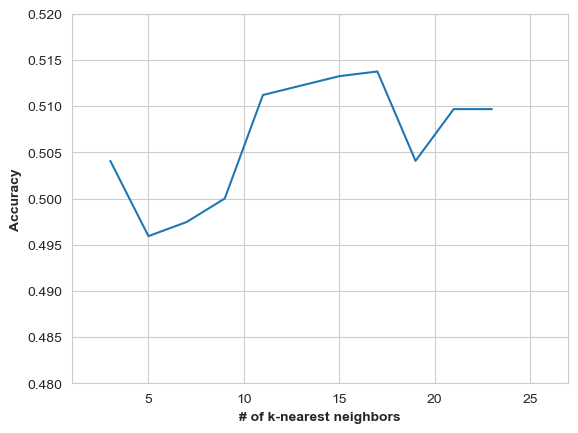

In [74]:
sns.set_style("whitegrid")

acc = {}
for k in range(3, 25, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc[k] = accuracy_score(y_test, y_pred)
    
# PLotting K v/s accuracy graph
plt.plot(range(3,25,2), acc.values())
plt.xlabel('# of k-nearest neighbors', weight = 'bold')
plt.ylabel('Accuracy', weight = 'bold')
plt.ylim(.48, .52)
plt.xlim(1, 27)

plt.show()

This notebook was written by Mary Ann Collins (https://github.com/maryanncollins)